In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
from matplotlib import cm

In [44]:
jobs_data = pd.read_csv("C:/Users/sravya.gangula/Downloads/trending_jobs.csv")
jobs_data.head(5)

,Job_title,Company,Job_posted_date,Link,Matching_percentage,Logo,Location,Job_description,Salary_range,Category
0,Junior Data Engineer (US),Fitness Matrix Inc,12/25/2023,https://www.linkedin.com/jobs/view/3793120666,0,https://media.licdn.com/dms/image/D4E0BAQGmk8Z...,"Philadelphia, PA","<div class=""show-more-less-html__markup show-m...",$66- $77,Data Engineer
1,Data Engineer (DE),Zortech Solutions,12/24/2023,https://www.linkedin.com/jobs/view/3787251275,0,https://media.licdn.com/dms/image/C4E0BAQFLYN9...,"Paradise Valley, AZ","<div class=""show-more-less-html__markup show-m...",No Salary Info Found,Data Engineer
2,Data Engineer,Sophinea Corporation,12/19/2023,https://www.linkedin.com/jobs/view/3790308997,0,https://media.licdn.com/dms/image/C4E0BAQHKGcS...,United States,"<div class=""show-more-less-html__markup show-m...",No Salary Info Found,Data Engineer
3,Data Engineer,Accroid Inc,12/19/2023,https://www.linkedin.com/jobs/view/3788129009,0,https://media.licdn.com/dms/image/D4D0BAQGz_di...,"Ankeny, IA","<div class=""show-more-less-html__markup show-m...",No Salary Info Found,Data Engineer
4,ETL Data Engineer,Zortech Solutions,12/19/2023,https://www.linkedin.com/jobs/view/3788124368,0,https://media.licdn.com/dms/image/C4E0BAQFLYN9...,"Georgia, United States","<div class=""show-more-less-html__markup show-m...",No Salary Info Found,Data Engineer


In [45]:
jobs_data.count() #see how many postings we have

Job_title              959
Company                959
Job_posted_date        959
Link                   959
Matching_percentage    959
Logo                   959
Location               959
Job_description        959
Salary_range           959
Category               959
dtype: int64

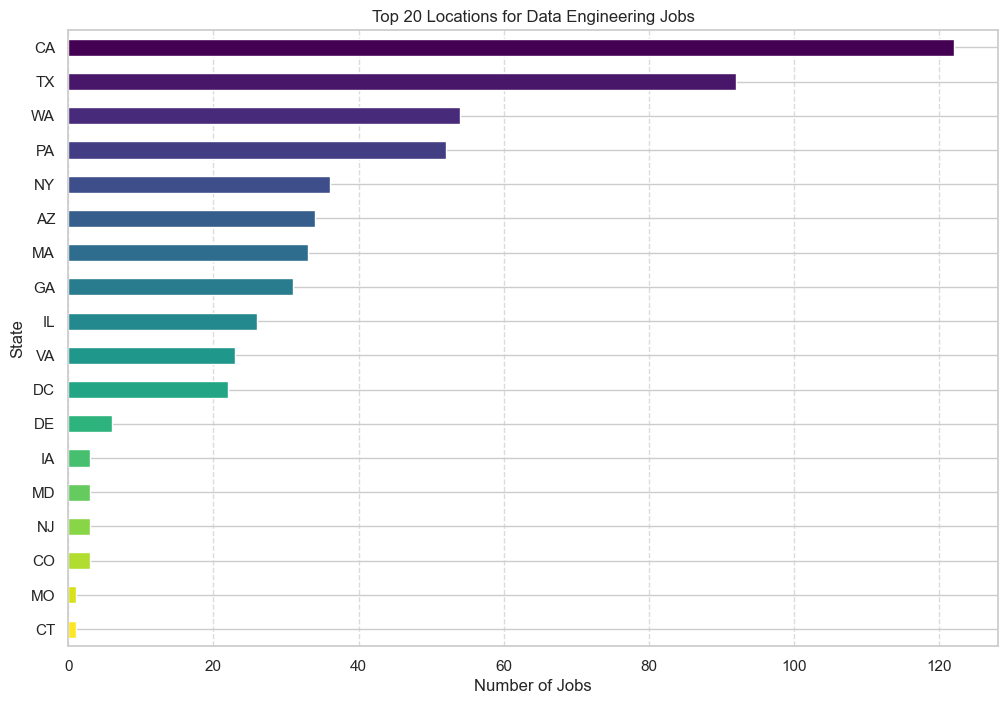

In [52]:

# Extract the state from the 'Location' column
jobs_data['State'] = jobs_data['Location'].str.extract(r',\s*(\w{2})$')

# Count the number of jobs by state and get the top 20 states
state_counts = jobs_data['State'].value_counts().head(20)

# Generate different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(state_counts)))

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
state_counts.plot(kind='barh', color=colors)  # Change to 'barh' for horizontal bars
plt.title('Top 20 Locations for Data Engineering Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to have the state with the most jobs on top
plt.show()


## From this we can say that California and Texas has more number of DE jobs.

##  Do These Jobs Need Experience?

C:\Users\sravya.gangula\AppData\Local\Temp\ipykernel_26048\4286855434.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('nipy_spectral')(np.linspace(0, 1, len(experience_counts)))


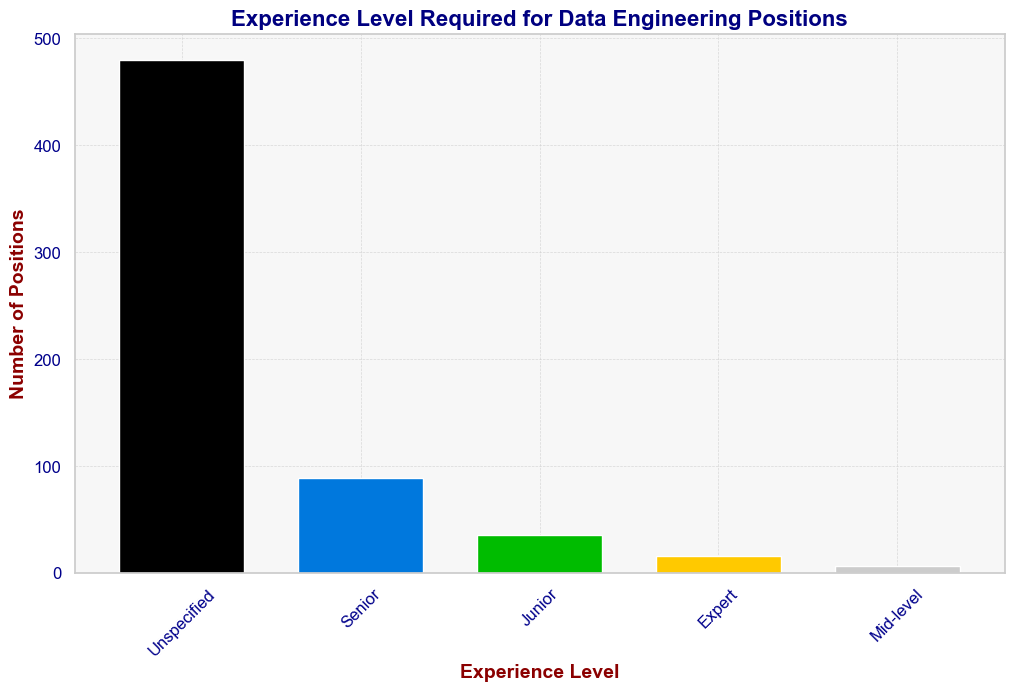

In [64]:
# Remove HTML tags and extract experience levels from job descriptions
jobs_data['Experience_Level'] = jobs_data['Job_description'].str.replace('<.*?>', '', regex=True).apply(
    lambda description: next((level for level, pattern in [
        ('Junior', r'\bjunior\b|\bentry level\b|\bno experience\b|\b1 year\b'),
        ('Mid-level', r'\bmid[-\s]level\b|\b2[-\s]5 years\b|\bintermediate\b'),
        ('Senior', r'\bsenior\b|\b5[-\s]10 years\b|\badvanced\b'),
        ('Expert', r'\bexpert\b|\b10\+ years\b|\bhighly skilled\b')
    ] if re.search(pattern, description, re.IGNORECASE)), 'Unspecified')
)

# Count jobs for each experience level and plot
experience_counts = jobs_data['Experience_Level'].value_counts()
colors = cm.get_cmap('nipy_spectral')(np.linspace(0, 1, len(experience_counts)))

plt.figure(figsize=(12, 7))  # Set the figure size
ax = experience_counts.plot(kind='bar', color=colors, width=0.7)  # Adjust bar width here
plt.title('Experience Level Required for Data Engineering Positions', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Experience Level', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Number of Positions', fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=12, fontweight='normal', color='darkblue')
plt.yticks(fontsize=12, fontweight='normal', color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_facecolor('#f7f7f7')  # Change background color of plot area
plt.show()


## Salary Range?

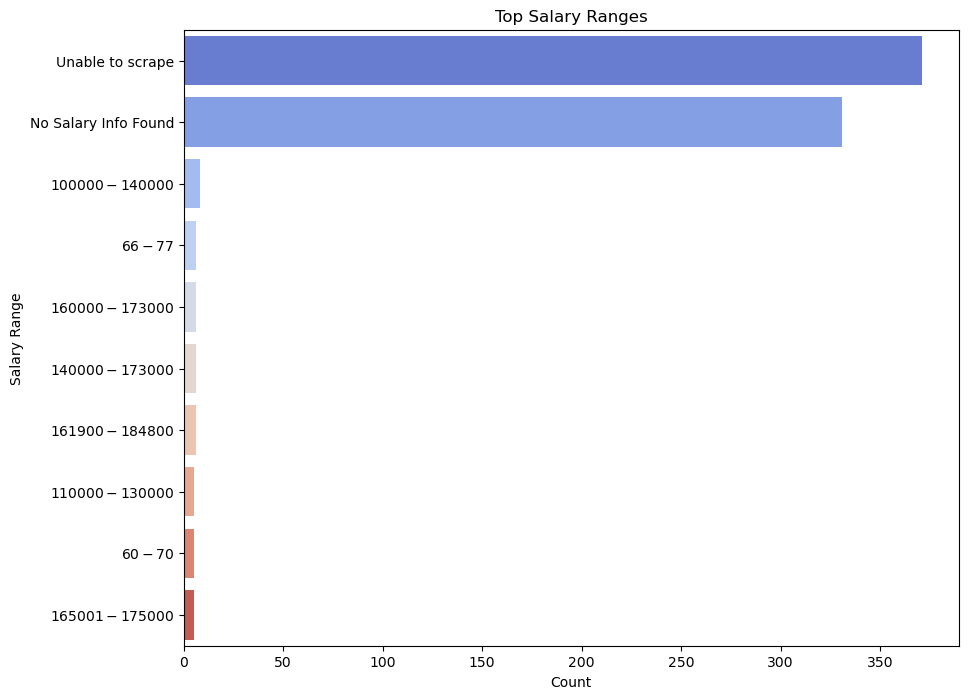

In [26]:
# Extract salary information
salary_info = job_data['Salary_range'].value_counts()

# Visualize the top salary ranges
fig, ax = plt.subplots(figsize=(10, 8))
salary_info_top = salary_info.head(10)  # Displaying top 10 salary ranges
sns.barplot(x=salary_info_top.values, y=salary_info_top.index, palette="coolwarm", ax=ax)
plt.title('Top Salary Ranges')
plt.xlabel('Count')
plt.ylabel('Salary Range')
plt.show()


C:\Users\sravya.gangula\AppData\Local\Temp\ipykernel_26048\4175211402.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10')(np.linspace(0, 1, len(education_counts)))


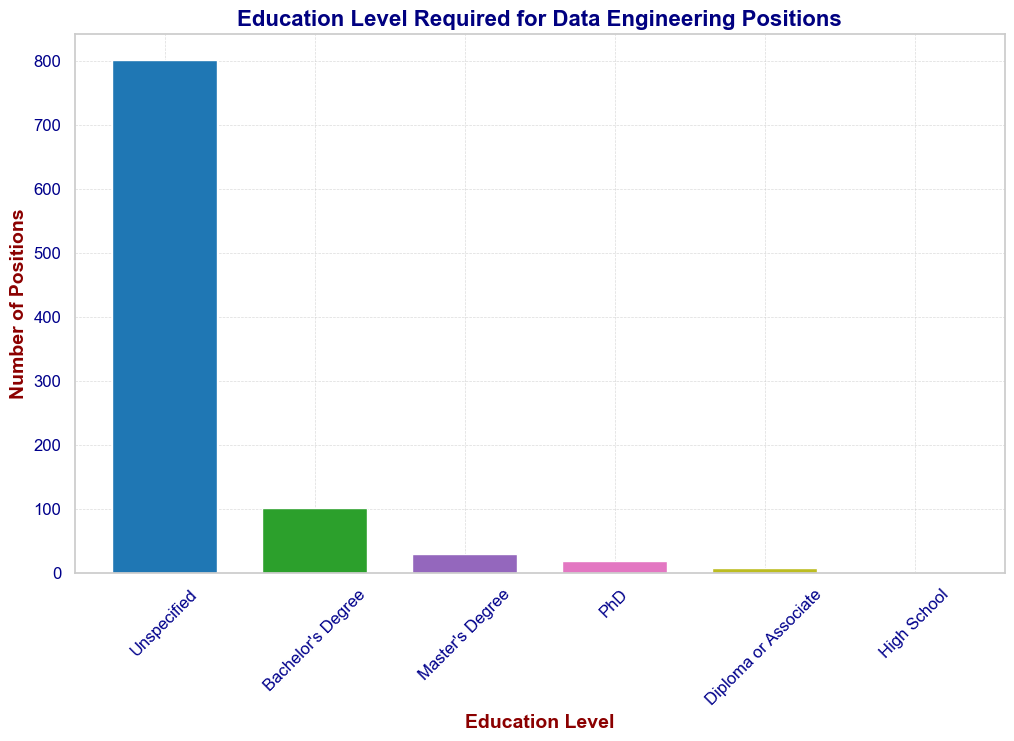

In [59]:
# Define regex patterns to categorize education levels
education_patterns = {
    "Bachelor's Degree": r'\bbachelor(\'s)? degree\b|\bundergraduate\b',
    "Master's Degree": r'\bmaster(\'s)? degree\b|\bgraduate\b',
    "PhD": r'\bPh\.?D\.?\b|\bDoctorate\b|\bdoctoral\b',
    "Diploma or Associate": r'\bdiploma\b|\bassociate(\'s)? degree\b',
    "High School": r'\bhigh school\b|\bsecondary\b'
}

# Determine education level from description
jobs_data['Education_Level'] = jobs_data['Cleaned_Description'].apply(
    lambda description: next((level for level, pattern in education_patterns.items() if re.search(pattern, description, re.IGNORECASE)), 'Unspecified')
)

# Count jobs for each education level
education_counts = jobs_data['Education_Level'].value_counts()

# Generate different colors for each education level
colors = cm.get_cmap('tab10')(np.linspace(0, 1, len(education_counts)))

# Create the vertical bar chart
plt.figure(figsize=(12, 7))
education_counts.plot(kind='bar', color=colors, width=0.7)
plt.title('Education Level Required for Data Engineering Positions', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Education Level', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Number of Positions', fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=12, fontweight='normal', color='darkblue')
plt.yticks(fontsize=12, fontweight='normal', color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


C:\Users\sravya.gangula\AppData\Local\Temp\ipykernel_26048\1895833115.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20')(np.linspace(0, 1, len(sorted_skills)))


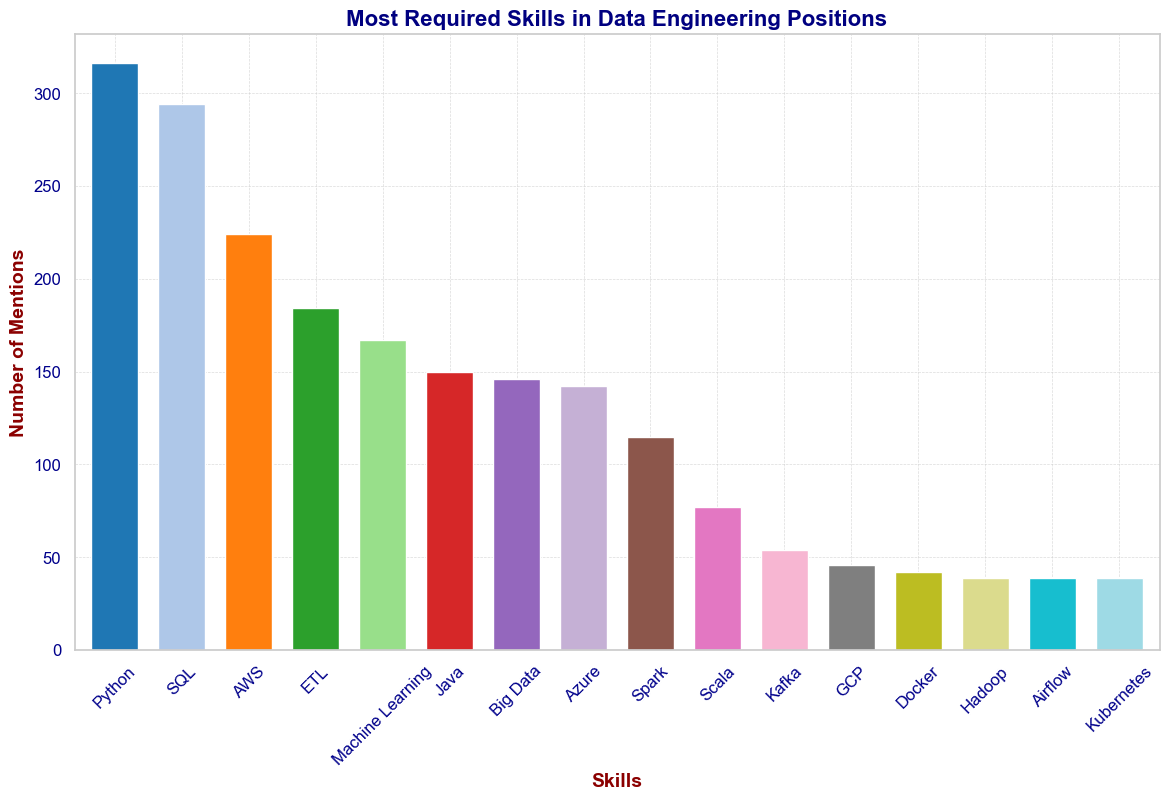

In [60]:
# Define common Data Engineering skills and technologies
skills_patterns = {
    "Python": r'\bPython\b',
    "SQL": r'\bSQL\b',
    "Java": r'\bJava\b',
    "Scala": r'\bScala\b',
    "Hadoop": r'\bHadoop\b',
    "Spark": r'\bSpark\b',
    "AWS": r'\bAWS\b',
    "Azure": r'\bAzure\b',
    "GCP": r'\bGCP\b',
    "Kafka": r'\bKafka\b',
    "Airflow": r'\bAirflow\b',
    "Docker": r'\bDocker\b',
    "Kubernetes": r'\bKubernetes\b',
    "Big Data": r'\bBig Data\b',
    "ETL": r'\bETL\b',
    "Machine Learning": r'\bMachine Learning\b'
}

# Determine presence of skills in descriptions
skills_counts = {skill: jobs_data['Cleaned_Description'].str.contains(pattern, regex=True, case=False).sum()
                 for skill, pattern in skills_patterns.items()}

# Convert to Series for plotting
skills_series = pd.Series(skills_counts)

# Sort skills by count
sorted_skills = skills_series.sort_values(ascending=False)

# Generate different colors for each skill
colors = cm.get_cmap('tab20')(np.linspace(0, 1, len(sorted_skills)))

# Create the vertical bar chart
plt.figure(figsize=(14, 8))
sorted_skills.plot(kind='bar', color=colors, width=0.7)
plt.title('Most Required Skills in Data Engineering Positions', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Skills', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Number of Mentions', fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=12, fontweight='normal', color='darkblue')
plt.yticks(fontsize=12, fontweight='normal', color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [62]:
# Filter out entries without specified salary information
jobs_data = jobs_data[~jobs_data['Salary_range'].str.contains('No Salary Info Found')]

# Initialize a list to store calculated average salaries
average_salaries = []

# Loop through each salary range in the DataFrame
for salary_range in jobs_data['Salary_range']:
    if '-' in salary_range:
        # Clean the salary string
        salary_range = salary_range.replace('$', '').replace('K', '000').replace(',', '')
        # Split the salary range into low and high values
        low, high = salary_range.split('-')
        # Calculate the average of the low and high values
        average = (float(low) + float(high)) / 2  # Use float to accommodate decimal points
        # Append the calculated average to the list
        average_salaries.append(average)

# Calculate the overall average salary if there are any salaries computed
if average_salaries:
    overall_average_salary = sum(average_salaries) / len(average_salaries)
    print(f"The average salary for Data Engineering positions in the U.S. is ${overall_average_salary:,.2f}")
else:
    print("No valid salary data available to calculate average.")

The average salary for Data Engineering positions in the U.S. is $122,889.29
